# Image Processing

## Imports / installs

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
#requirements
import nibabel as nib
import glob
from pathlib import Path
from sklearn.cluster import KMeans
#pip install "napari[all]"
import napari

## Retrieving all file paths 

In [5]:
def get_file_paths(file_ext = 'img', ipath = '../raw_data/OASIS2'):
    '''retrieve all file paths(*.img)'''
    full_path = []
    for p in Path(ipath).rglob("*."+file_ext):
        full_path.append(str(p))
        
    return full_path

## Get images in dataframe

In [1]:
def get_img_df(file_ext = 'img', 
               ipath = '../raw_data/OASIS2', 
               datatype = 'mean', 
               plane = 'sag',
               no_rows = -1):
    '''
    Get image dataframe.
    'Subject ID', 'session', 'file_names', 'full_path', 'image_files'
    datatype = 'mean' returns mean of 128 images of each mri image format.
    datatype = '3d' returns images with one plane(sag/cor/tra) of each mri image format.
    '''
    full_path = get_file_paths(file_ext, ipath)
    full_path.sort()
    
    if no_rows == -1:
        number = len(full_path)
    else:
        number = no_rows
        
    file_lists = []
    for i in full_path[:number]:
        #[i[28:37], i[38:41], i[46:], i, mri_file])
        if datatype == 'mean':
            mri_file = {}
            mri_file['img'] = np.mean(nib.load(i).get_fdata(), axis = 2)
            file_lists.append([i[28:37], i[38:41], i[46:], i, mri_file['img']])
            
        elif datatype == '3d':
            if plane == 'sag':
                mri_file = {}
                mri_file['sag'] = nib.load(i).get_fdata()[:,:,64]
                file_lists.append([i[28:37], i[38:41], i[46:], i, plane, mri_file[plane]])
                
            elif plane == 'cor':
                mri_file = {}
                mri_file['cor'] = nib.load(i).get_fdata()[128,:,:]
                file_lists.append([i[28:37], i[38:41], i[46:], i, plane, mri_file[plane]])
                
            elif plane == 'tra':
                mri_file = {}
                mri_file['tra'] = nib.load(i).get_fdata()[:,128,:]
                file_lists.append([i[28:37], i[38:41], i[46:], i, plane, mri_file[plane]])
                
#             mri_file = {}
#             mri_file['sag'] = nib.load(i).get_fdata()[:,:,64]
#             mri_file['cor'] = nib.load(i).get_fdata()[128,:,:]
#             mri_file['tra'] = nib.load(i).get_fdata()[:,128,:]
        
#         if len(mri_file) == 1:
#             file_lists.append([i[28:37], i[38:41], i[46:], i, mri_file['img']])
#         elif len(mri_file) == 3:
#             for plane in mri_file.keys():
#                 file_lists.append([i[28:37], i[38:41], i[46:], i, plane, mri_file[plane]])

    if len(file_lists[0]) == 5:
        file_df = pd.DataFrame(file_lists, columns = ['Subject ID', 'session', 'file_names', 'full_path', 'image_files'])
    elif len(file_lists[0]) == 6:
        file_df = pd.DataFrame(file_lists, columns = ['Subject ID', 'session', 'file_names', 'full_path', 'plane', 'image_files'])
    
    
#     if len(file_lists[0]) == 5:
#         file_df = pd.DataFrame(file_lists, columns = ['full_path', 'image_files'])
#     elif len(file_lists[0]) == 6:
#         file_df = pd.DataFrame(file_lists, columns = ['full_path', 'plane', 'image_files'])
    
    return file_df

In [6]:
def get_mean_img_df(file_ext = 'img', 
               ipath = '../raw_data/OASIS2',
               no_rows = -1):
    '''
    Get image dataframe.
    'Subject ID', 'session', 'file_names', 'full_path', 'image_files'
    datatype = 'mean' returns mean of 128 images of each mri image format.
    datatype = '3d' returns images with one plane(sag/cor/tra) of each mri image format.
    '''
    full_path = get_file_paths(file_ext, ipath)
    full_path.sort()
    
    if no_rows == -1:
        number = len(full_path)
    else:
        number = no_rows
        
    file_lists = []
    for i in full_path[:number]:
        mri_file = np.mean(nib.load(i).get_fdata(), axis = 2)
        file_lists.append([i, mri_file])

    file_df = pd.DataFrame(file_lists, columns = ['full_path', 'mean_img'])
    
    return file_df

In [7]:
mean_img = get_mean_img_df(no_rows= 5)
print(mean_img.head())

                                           full_path  \
0  ../raw_data/OASIS2/OAS2_RAW/OAS2_0001_MR1/RAW/...   
1  ../raw_data/OASIS2/OAS2_RAW/OAS2_0001_MR1/RAW/...   
2  ../raw_data/OASIS2/OAS2_RAW/OAS2_0001_MR1/RAW/...   
3  ../raw_data/OASIS2/OAS2_RAW/OAS2_0001_MR2/RAW/...   
4  ../raw_data/OASIS2/OAS2_RAW/OAS2_0001_MR2/RAW/...   

                                            mean_img  
0  [[[126.4453125], [127.96875], [118.6640625], [...  
1  [[[124.7421875], [126.1171875], [130.9765625],...  
2  [[[135.125], [127.5078125], [132.953125], [121...  
3  [[[138.8125], [143.2265625], [147.265625], [15...  
4  [[[150.8828125], [157.09375], [141.5234375], [...  


In [15]:
def get_plane_img_df(file_ext = 'img',
                     ipath = '../raw_data/OASIS2',
                     plane = 'sag',
                     no_rows = -1):
    '''
    Get image dataframe.
    'Subject ID', 'session', 'file_names', 'full_path', 'image_files'
    datatype = 'mean' returns mean of 128 images of each mri image format.
    datatype = '3d' returns images with one plane(sag/cor/tra) of each mri image format.
    '''
    full_path = get_file_paths(file_ext, ipath)
    full_path.sort()
    
    if no_rows == -1:
        number = len(full_path)
    else:
        number = no_rows
    
    file_lists = []
    for i in full_path[:number]:
        if plane == 'sag':
            mri_file = nib.load(i).get_fdata()[:,:,64]
            file_lists.append([i, mri_file])
                
        elif plane == 'cor':
            mri_file = nib.load(i).get_fdata()[128,:,:]
            file_lists.append([i, mri_file])
                
        elif plane == 'tra':
            mri_file = nib.load(i).get_fdata()[:,128,:]
            file_lists.append([i, mri_file])
                
    file_df = pd.DataFrame(file_lists, columns = ['full_path', 'plane'])
    
    return file_df

In [ ]:
sag_imgs = get_plane_img_df()

In [17]:
sag_imgs

full_path  \
0  ../raw_data/OASIS2/OAS2_RAW/OAS2_0001_MR1/RAW/...   
1  ../raw_data/OASIS2/OAS2_RAW/OAS2_0001_MR1/RAW/...   
2  ../raw_data/OASIS2/OAS2_RAW/OAS2_0001_MR1/RAW/...   
3  ../raw_data/OASIS2/OAS2_RAW/OAS2_0001_MR2/RAW/...   
4  ../raw_data/OASIS2/OAS2_RAW/OAS2_0001_MR2/RAW/...   
5  ../raw_data/OASIS2/OAS2_RAW/OAS2_0001_MR2/RAW/...   
6  ../raw_data/OASIS2/OAS2_RAW/OAS2_0002_MR1/RAW/...   
7  ../raw_data/OASIS2/OAS2_RAW/OAS2_0002_MR1/RAW/...   
8  ../raw_data/OASIS2/OAS2_RAW/OAS2_0002_MR1/RAW/...   
9  ../raw_data/OASIS2/OAS2_RAW/OAS2_0002_MR1/RAW/...   

                                               plane  
0  [[[54.0], [238.0], [155.0], [65.0], [85.0], [9...  
1  [[[33.0], [157.0], [341.0], [133.0], [199.0], ...  
2  [[[183.0], [87.0], [244.0], [65.0], [179.0], [...  
3  [[[123.0], [54.0], [102.0], [221.0], [218.0], ...  
4  [[[228.0], [83.0], [28.0], [199.0], [216.0], [...  
5  [[[425.0], [53.0], [249.0], [47.0], [74.0], [2...  
6  [[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...  
7  [[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...  
8  [[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...  
9  [[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...

In [9]:
mean_imgs = get_mean_img_df(no_rows= 10)

In [10]:
mean_imgs

full_path  \
0  ../raw_data/OASIS2/OAS2_RAW/OAS2_0001_MR1/RAW/...   
1  ../raw_data/OASIS2/OAS2_RAW/OAS2_0001_MR1/RAW/...   
2  ../raw_data/OASIS2/OAS2_RAW/OAS2_0001_MR1/RAW/...   
3  ../raw_data/OASIS2/OAS2_RAW/OAS2_0001_MR2/RAW/...   
4  ../raw_data/OASIS2/OAS2_RAW/OAS2_0001_MR2/RAW/...   
5  ../raw_data/OASIS2/OAS2_RAW/OAS2_0001_MR2/RAW/...   
6  ../raw_data/OASIS2/OAS2_RAW/OAS2_0002_MR1/RAW/...   
7  ../raw_data/OASIS2/OAS2_RAW/OAS2_0002_MR1/RAW/...   
8  ../raw_data/OASIS2/OAS2_RAW/OAS2_0002_MR1/RAW/...   
9  ../raw_data/OASIS2/OAS2_RAW/OAS2_0002_MR1/RAW/...   

                                            mean_img  
0  [[[126.4453125], [127.96875], [118.6640625], [...  
1  [[[124.7421875], [126.1171875], [130.9765625],...  
2  [[[135.125], [127.5078125], [132.953125], [121...  
3  [[[138.8125], [143.2265625], [147.265625], [15...  
4  [[[150.8828125], [157.09375], [141.5234375], [...  
5  [[[168.1796875], [160.375], [173.7890625], [14...  
6  [[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...  
7  [[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...  
8  [[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...  
9  [[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...

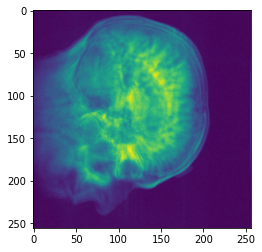

In [11]:
plt.imshow(mean_imgs.mean_img[0])

In [5]:
samples_3d = get_img_df('img', datatype = '3d', no_rows = 10)

In [6]:
samples_mean = get_img_df('img', no_rows = 10)

## Plot 3d / mean images from dataframe

In [7]:
def plot_mri_image(dataframe, subject_id = -1):
    '''
    Plot mri images. 
    WARNING! subject_id = -1 plots all images in the dataframe !
    This function automatically detects mean/3planes images and plots them accordingly.
    '''
    if subject_id != -1:
        subject_df = dataframe[dataframe['Subject ID'] == subject_id]
    else :
        subject_df = dataframe[dataframe['Subject ID'] == dataframe['Subject ID'][0]]
    
    
    if len(subject_df.iloc[0]) == 5:
        for i in range(len(subject_df)):
            img = subject_df['image_files'].iloc[i]
            plt.imshow(np.rot90(img))
            plt.title(f'''Subject ID : {subject_df['Subject ID'].iloc[i]},
            Session : {subject_df['session'].iloc[i]},
            File : {subject_df['file_names'].iloc[i]}''')
            plt.show()
            
    elif len(subject_df.iloc[0]) == 6:
        for j in range(int(len(subject_df)/3)):
            jj = 3 * j
            fig = plt.figure(figsize = (12, 6))
            fig.suptitle(f'''Subject ID : {subject_df['Subject ID'].iloc[jj]}, 
                      Session : {subject_df['session'].iloc[jj]}, 
                      File : {subject_df['file_names'].iloc[jj]}''', fontsize="large")
            
            img1 = subject_df['image_files'].iloc[jj]
            plt.subplot(1, 2, 1)
            plt.imshow(np.rot90(img1))
            plt.xlabel(f'''Plane : {subject_df['plane'].iloc[jj]}''')
            
            img2 = subject_df['image_files'].iloc[jj+1]
            plt.subplot(1, 4, 3)
            plt.imshow(img2)
            plt.xlabel(f'''Plane : {subject_df['plane'].iloc[jj+1]}''')

            
            img3 = subject_df['image_files'].iloc[jj+2]
            plt.subplot(1, 4, 4)
            plt.imshow(img3)
            plt.xlabel(f'''Plane : {subject_df['plane'].iloc[jj+2]}''')

            
            plt.show()
    

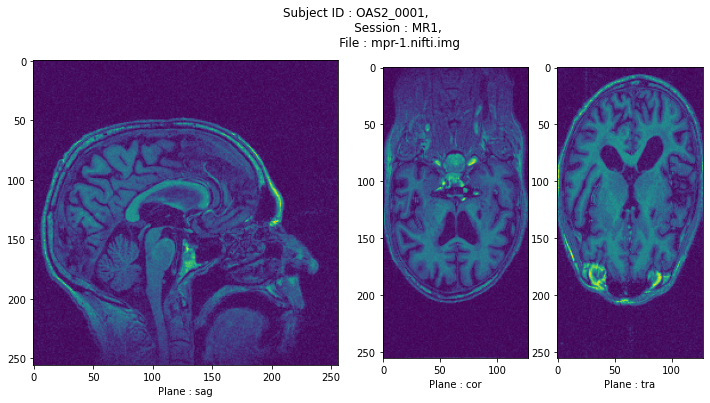

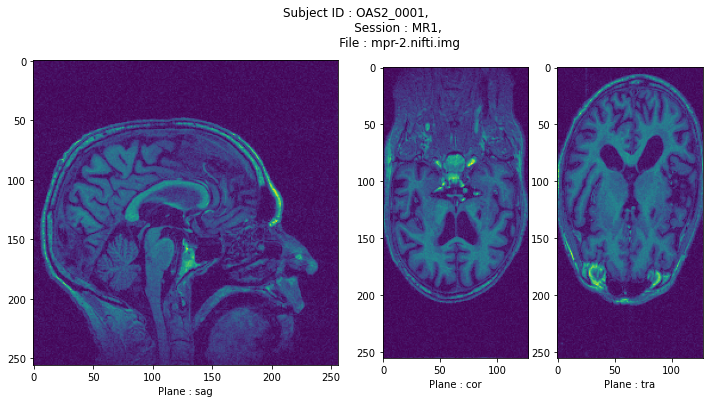

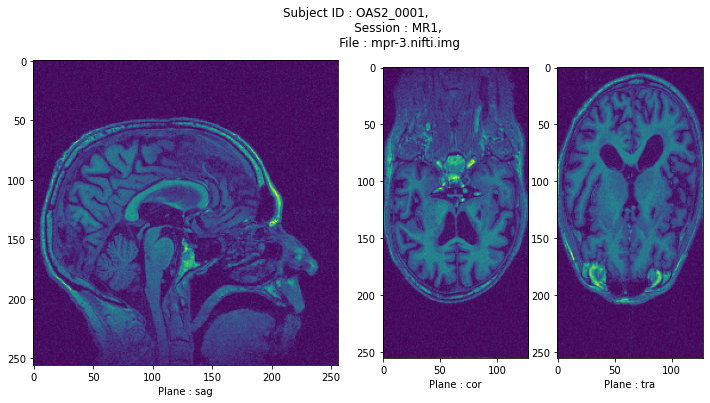

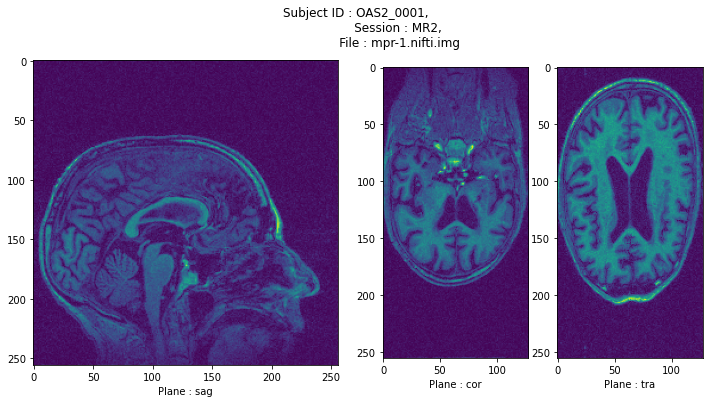

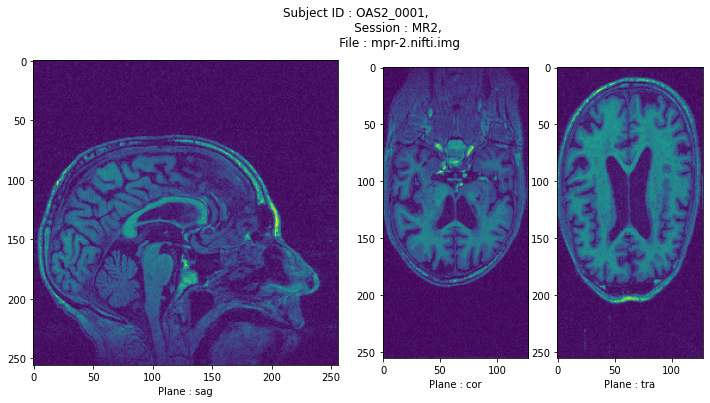

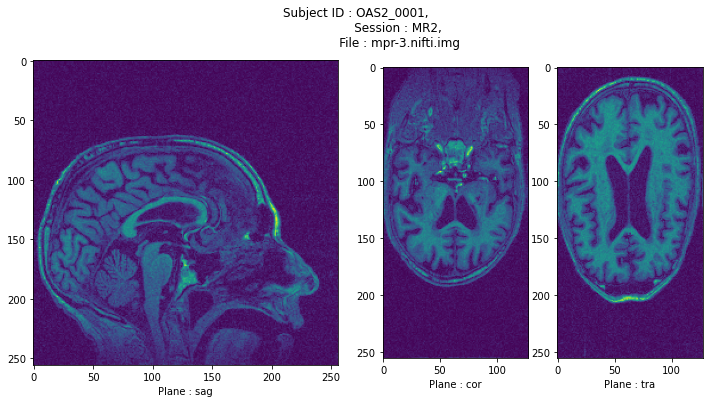

In [9]:
plot_mri_image(samples_3d)

## Compressing images in a dataframe

In [10]:
sample_mean = samples_mean.image_files[0]
sample_mean_res = sample_mean.reshape(256 * 256, 1)

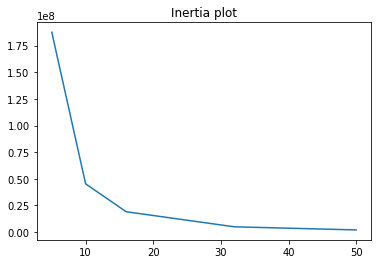

In [11]:
############################################################
##### plotting inertia to find optimal cluster numbers #####
############################################################

inertias = []
k = [5, 10, 16, 32, 50]

for K in k:
    km_test = KMeans(n_clusters = K).fit(sample_mean_res)
    inertias.append(km_test.inertia_)

plt.plot(k, inertias)
plt.title('Inertia plot')
plt.show()

In [12]:
############################################################
#####          cluster number for KMeans = 16          #####
############################################################

In [11]:
def compress_images(dataframe):
    img_list = []
    for idx, img in enumerate(dataframe.image_files):
        x = img.shape[0]
        y = img.shape[1]
        img_re = img.reshape(x * y, 1)
        km16 = KMeans(n_clusters=16).fit(img_re)
        km16_compressed = np.array(km16.cluster_centers_[km16.labels_])
        img_comp = km16_compressed.reshape(x, y, 1).astype('uint16')
        img_list.append(img_comp)
        i = dataframe.full_path[idx]
        print(f'compressing {i[28:37], i[38:41], i[46:]}...')
    
    dataframe.image_files = img_list
    return dataframe

In [14]:
samples_3d_comp = compress_images(samples_3d)

compressing ('OAS2_0001', 'MR1', 'mpr-1.nifti.img')...
compressing ('OAS2_0001', 'MR1', 'mpr-1.nifti.img')...
compressing ('OAS2_0001', 'MR1', 'mpr-1.nifti.img')...
compressing ('OAS2_0001', 'MR1', 'mpr-2.nifti.img')...
compressing ('OAS2_0001', 'MR1', 'mpr-2.nifti.img')...
compressing ('OAS2_0001', 'MR1', 'mpr-2.nifti.img')...
compressing ('OAS2_0001', 'MR1', 'mpr-3.nifti.img')...
compressing ('OAS2_0001', 'MR1', 'mpr-3.nifti.img')...
compressing ('OAS2_0001', 'MR1', 'mpr-3.nifti.img')...
compressing ('OAS2_0001', 'MR2', 'mpr-1.nifti.img')...
compressing ('OAS2_0001', 'MR2', 'mpr-1.nifti.img')...
compressing ('OAS2_0001', 'MR2', 'mpr-1.nifti.img')...
compressing ('OAS2_0001', 'MR2', 'mpr-2.nifti.img')...
compressing ('OAS2_0001', 'MR2', 'mpr-2.nifti.img')...
compressing ('OAS2_0001', 'MR2', 'mpr-2.nifti.img')...
compressing ('OAS2_0001', 'MR2', 'mpr-3.nifti.img')...
compressing ('OAS2_0001', 'MR2', 'mpr-3.nifti.img')...
compressing ('OAS2_0001', 'MR2', 'mpr-3.nifti.img')...
compressin

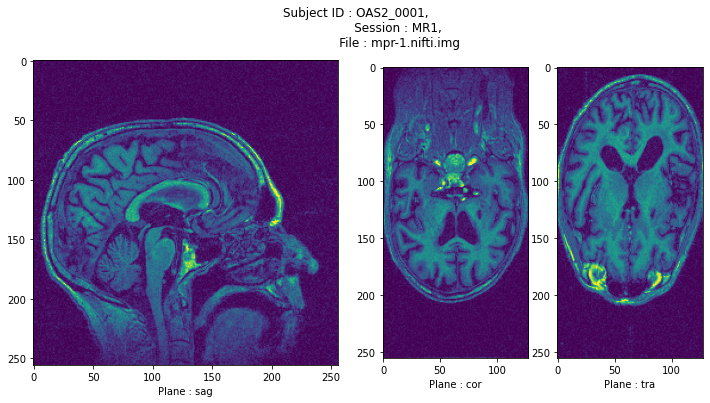

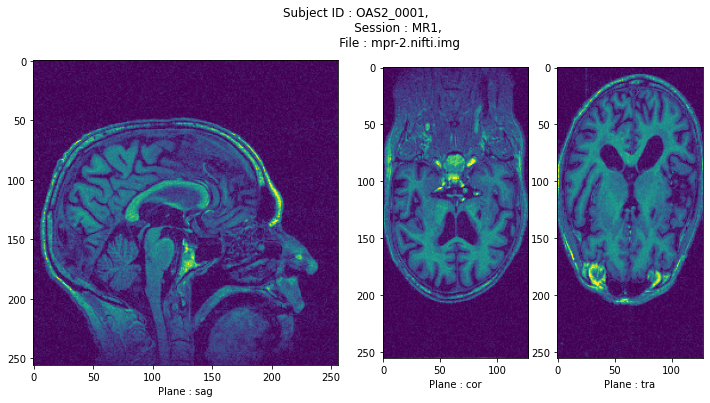

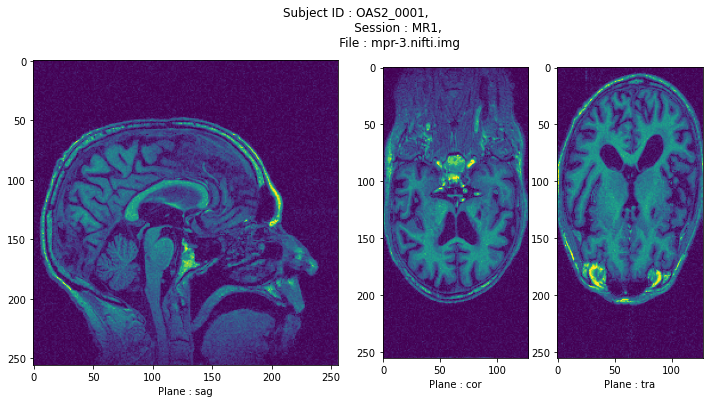

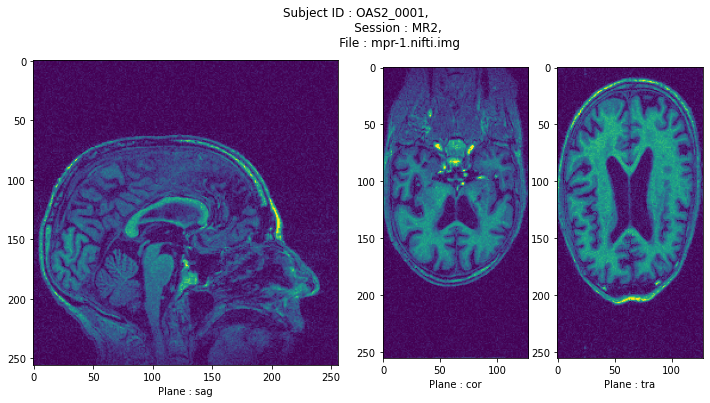

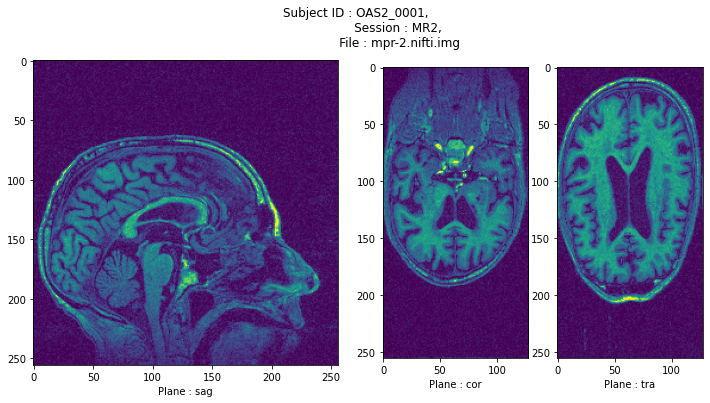

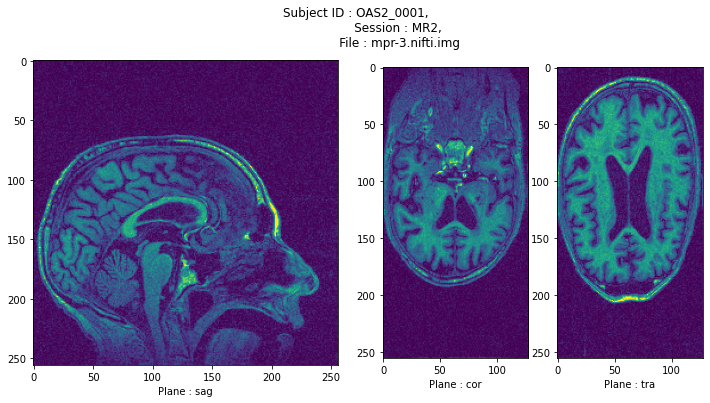

In [15]:
plot_mri_image(samples_3d_comp)

## (Optional) Display whole MRI volume image

In [16]:
def display_volume():
    '''
    takes (subject)ID number / (MRI)session number / image number as parameter 
    and opens its file on Napari
    '''
    ID = input('Enter ID number in **** format:\n')
    session = input('Enter session number in * format:\n')
    image_no = input('Enter image number in * format:\n')


    partial_path = '../raw_data/OASIS2/OAS2_RAW/'
    rest_path = f'OAS2_{ID}_MR{session}/RAW/mpr-{image_no}.nifti.img'

    volume_file = nib.load(partial_path+rest_path).get_fdata()
    napari.view_image(np.rot90(np.rot90(volume_file)), name='MRI_3D')

In [18]:
display_volume()

Enter ID number in **** format:
0071
Enter session number in * format:
1
Enter image number in * format:
1


In [ ]:
all_images_3d_sag = get_img_df('img', datatype = '3d')

In [12]:
all_images_3d = compress_images(all_images_3d)

compressing ('OAS2_0001', 'MR1', 'mpr-1.nifti.img')...
compressing ('OAS2_0001', 'MR1', 'mpr-2.nifti.img')...
compressing ('OAS2_0001', 'MR1', 'mpr-3.nifti.img')...
compressing ('OAS2_0001', 'MR2', 'mpr-1.nifti.img')...
compressing ('OAS2_0001', 'MR2', 'mpr-2.nifti.img')...
compressing ('OAS2_0001', 'MR2', 'mpr-3.nifti.img')...
compressing ('OAS2_0002', 'MR1', 'mpr-1.nifti.img')...
compressing ('OAS2_0002', 'MR1', 'mpr-2.nifti.img')...
compressing ('OAS2_0002', 'MR1', 'mpr-3.nifti.img')...
compressing ('OAS2_0002', 'MR1', 'mpr-4.nifti.img')...
compressing ('OAS2_0002', 'MR2', 'mpr-1.nifti.img')...
compressing ('OAS2_0002', 'MR2', 'mpr-2.nifti.img')...
compressing ('OAS2_0002', 'MR2', 'mpr-3.nifti.img')...
compressing ('OAS2_0002', 'MR2', 'mpr-4.nifti.img')...
compressing ('OAS2_0002', 'MR3', 'mpr-1.nifti.img')...
compressing ('OAS2_0002', 'MR3', 'mpr-2.nifti.img')...
compressing ('OAS2_0002', 'MR3', 'mpr-3.nifti.img')...
compressing ('OAS2_0004', 'MR1', 'mpr-1.nifti.img')...
compressin

compressing ('OAS2_0021', 'MR2', 'mpr-3.nifti.img')...
compressing ('OAS2_0022', 'MR1', 'mpr-1.nifti.img')...
compressing ('OAS2_0022', 'MR1', 'mpr-2.nifti.img')...
compressing ('OAS2_0022', 'MR1', 'mpr-3.nifti.img')...
compressing ('OAS2_0022', 'MR1', 'mpr-4.nifti.img')...
compressing ('OAS2_0022', 'MR2', 'mpr-1.nifti.img')...
compressing ('OAS2_0022', 'MR2', 'mpr-2.nifti.img')...
compressing ('OAS2_0022', 'MR2', 'mpr-3.nifti.img')...
compressing ('OAS2_0023', 'MR1', 'mpr-1.nifti.img')...
compressing ('OAS2_0023', 'MR1', 'mpr-2.nifti.img')...
compressing ('OAS2_0023', 'MR1', 'mpr-3.nifti.img')...
compressing ('OAS2_0023', 'MR1', 'mpr-4.nifti.img')...
compressing ('OAS2_0023', 'MR2', 'mpr-1.nifti.img')...
compressing ('OAS2_0023', 'MR2', 'mpr-2.nifti.img')...
compressing ('OAS2_0023', 'MR2', 'mpr-3.nifti.img')...
compressing ('OAS2_0023', 'MR2', 'mpr-4.nifti.img')...
compressing ('OAS2_0026', 'MR1', 'mpr-1.nifti.img')...
compressing ('OAS2_0026', 'MR1', 'mpr-2.nifti.img')...
compressin

compressing ('OAS2_0041', 'MR1', 'mpr-4.nifti.img')...
compressing ('OAS2_0041', 'MR2', 'mpr-1.nifti.img')...
compressing ('OAS2_0041', 'MR2', 'mpr-2.nifti.img')...
compressing ('OAS2_0041', 'MR2', 'mpr-3.nifti.img')...
compressing ('OAS2_0041', 'MR2', 'mpr-4.nifti.img')...
compressing ('OAS2_0041', 'MR3', 'mpr-1.nifti.img')...
compressing ('OAS2_0041', 'MR3', 'mpr-2.nifti.img')...
compressing ('OAS2_0041', 'MR3', 'mpr-3.nifti.img')...
compressing ('OAS2_0042', 'MR1', 'mpr-1.nifti.img')...
compressing ('OAS2_0042', 'MR1', 'mpr-2.nifti.img')...
compressing ('OAS2_0042', 'MR1', 'mpr-3.nifti.img')...
compressing ('OAS2_0042', 'MR1', 'mpr-4.nifti.img')...
compressing ('OAS2_0042', 'MR2', 'mpr-1.nifti.img')...
compressing ('OAS2_0042', 'MR2', 'mpr-2.nifti.img')...
compressing ('OAS2_0042', 'MR2', 'mpr-3.nifti.img')...
compressing ('OAS2_0042', 'MR2', 'mpr-4.nifti.img')...
compressing ('OAS2_0043', 'MR1', 'mpr-1.nifti.img')...
compressing ('OAS2_0043', 'MR1', 'mpr-2.nifti.img')...
compressin

compressing ('OAS2_0057', 'MR1', 'mpr-4.nifti.img')...
compressing ('OAS2_0057', 'MR2', 'mpr-1.nifti.img')...
compressing ('OAS2_0057', 'MR2', 'mpr-2.nifti.img')...
compressing ('OAS2_0057', 'MR2', 'mpr-3.nifti.img')...
compressing ('OAS2_0057', 'MR2', 'mpr-4.nifti.img')...
compressing ('OAS2_0057', 'MR3', 'mpr-1.nifti.img')...
compressing ('OAS2_0057', 'MR3', 'mpr-2.nifti.img')...
compressing ('OAS2_0057', 'MR3', 'mpr-3.nifti.img')...
compressing ('OAS2_0058', 'MR1', 'mpr-1.nifti.img')...
compressing ('OAS2_0058', 'MR1', 'mpr-2.nifti.img')...
compressing ('OAS2_0058', 'MR1', 'mpr-3.nifti.img')...
compressing ('OAS2_0058', 'MR1', 'mpr-4.nifti.img')...
compressing ('OAS2_0058', 'MR2', 'mpr-1.nifti.img')...
compressing ('OAS2_0058', 'MR2', 'mpr-2.nifti.img')...
compressing ('OAS2_0058', 'MR2', 'mpr-3.nifti.img')...
compressing ('OAS2_0058', 'MR2', 'mpr-4.nifti.img')...
compressing ('OAS2_0058', 'MR3', 'mpr-1.nifti.img')...
compressing ('OAS2_0058', 'MR3', 'mpr-2.nifti.img')...
compressin

compressing ('OAS2_0075', 'MR1', 'mpr-4.nifti.img')...
compressing ('OAS2_0075', 'MR2', 'mpr-1.nifti.img')...
compressing ('OAS2_0075', 'MR2', 'mpr-2.nifti.img')...
compressing ('OAS2_0075', 'MR2', 'mpr-3.nifti.img')...
compressing ('OAS2_0075', 'MR2', 'mpr-4.nifti.img')...
compressing ('OAS2_0076', 'MR1', 'mpr-1.nifti.img')...
compressing ('OAS2_0076', 'MR1', 'mpr-2.nifti.img')...
compressing ('OAS2_0076', 'MR1', 'mpr-3.nifti.img')...
compressing ('OAS2_0076', 'MR1', 'mpr-4.nifti.img')...
compressing ('OAS2_0076', 'MR2', 'mpr-1.nifti.img')...
compressing ('OAS2_0076', 'MR2', 'mpr-2.nifti.img')...
compressing ('OAS2_0076', 'MR2', 'mpr-3.nifti.img')...
compressing ('OAS2_0076', 'MR2', 'mpr-4.nifti.img')...
compressing ('OAS2_0076', 'MR3', 'mpr-1.nifti.img')...
compressing ('OAS2_0076', 'MR3', 'mpr-2.nifti.img')...
compressing ('OAS2_0076', 'MR3', 'mpr-3.nifti.img')...
compressing ('OAS2_0077', 'MR1', 'mpr-1.nifti.img')...
compressing ('OAS2_0077', 'MR1', 'mpr-2.nifti.img')...
compressin

compressing ('OAS2_0096', 'MR1', 'mpr-2.nifti.img')...
compressing ('OAS2_0096', 'MR1', 'mpr-3.nifti.img')...
compressing ('OAS2_0096', 'MR1', 'mpr-4.nifti.img')...
compressing ('OAS2_0096', 'MR2', 'mpr-1.nifti.img')...
compressing ('OAS2_0096', 'MR2', 'mpr-2.nifti.img')...
compressing ('OAS2_0096', 'MR2', 'mpr-3.nifti.img')...
compressing ('OAS2_0097', 'MR1', 'mpr-1.nifti.img')...
compressing ('OAS2_0097', 'MR1', 'mpr-2.nifti.img')...
compressing ('OAS2_0097', 'MR1', 'mpr-3.nifti.img')...
compressing ('OAS2_0097', 'MR1', 'mpr-4.nifti.img')...
compressing ('OAS2_0097', 'MR2', 'mpr-1.nifti.img')...
compressing ('OAS2_0097', 'MR2', 'mpr-2.nifti.img')...
compressing ('OAS2_0097', 'MR2', 'mpr-3.nifti.img')...
compressing ('OAS2_0098', 'MR1', 'mpr-1.nifti.img')...
compressing ('OAS2_0098', 'MR1', 'mpr-2.nifti.img')...
compressing ('OAS2_0098', 'MR1', 'mpr-3.nifti.img')...
compressing ('OAS2_0098', 'MR1', 'mpr-4.nifti.img')...
compressing ('OAS2_0098', 'MR2', 'mpr-1.nifti.img')...
compressin

compressing ('OAS2_0117', 'MR2', 'mpr-2.nifti.img')...
compressing ('OAS2_0117', 'MR2', 'mpr-3.nifti.img')...
compressing ('OAS2_0117', 'MR2', 'mpr-4.nifti.img')...
compressing ('OAS2_0117', 'MR3', 'mpr-1.nifti.img')...
compressing ('OAS2_0117', 'MR3', 'mpr-2.nifti.img')...
compressing ('OAS2_0117', 'MR3', 'mpr-3.nifti.img')...
compressing ('OAS2_0117', 'MR4', 'mpr-1.nifti.img')...
compressing ('OAS2_0117', 'MR4', 'mpr-2.nifti.img')...
compressing ('OAS2_0117', 'MR4', 'mpr-3.nifti.img')...
compressing ('OAS2_0118', 'MR1', 'mpr-1.nifti.img')...
compressing ('OAS2_0118', 'MR1', 'mpr-2.nifti.img')...
compressing ('OAS2_0118', 'MR1', 'mpr-3.nifti.img')...
compressing ('OAS2_0118', 'MR1', 'mpr-4.nifti.img')...
compressing ('OAS2_0118', 'MR2', 'mpr-1.nifti.img')...
compressing ('OAS2_0118', 'MR2', 'mpr-2.nifti.img')...
compressing ('OAS2_0118', 'MR2', 'mpr-3.nifti.img')...
compressing ('OAS2_0119', 'MR1', 'mpr-1.nifti.img')...
compressing ('OAS2_0119', 'MR1', 'mpr-2.nifti.img')...
compressin

compressing ('OAS2_0139', 'MR2', 'mpr-2.nifti.img')...
compressing ('OAS2_0139', 'MR2', 'mpr-3.nifti.img')...
compressing ('OAS2_0140', 'MR1', 'mpr-1.nifti.img')...
compressing ('OAS2_0140', 'MR1', 'mpr-2.nifti.img')...
compressing ('OAS2_0140', 'MR1', 'mpr-3.nifti.img')...
compressing ('OAS2_0140', 'MR1', 'mpr-4.nifti.img')...
compressing ('OAS2_0140', 'MR2', 'mpr-1.nifti.img')...
compressing ('OAS2_0140', 'MR2', 'mpr-2.nifti.img')...
compressing ('OAS2_0140', 'MR2', 'mpr-3.nifti.img')...
compressing ('OAS2_0140', 'MR2', 'mpr-4.nifti.img')...
compressing ('OAS2_0140', 'MR3', 'mpr-1.nifti.img')...
compressing ('OAS2_0140', 'MR3', 'mpr-2.nifti.img')...
compressing ('OAS2_0140', 'MR3', 'mpr-3.nifti.img')...
compressing ('OAS2_0141', 'MR1', 'mpr-1.nifti.img')...
compressing ('OAS2_0141', 'MR1', 'mpr-2.nifti.img')...
compressing ('OAS2_0141', 'MR1', 'mpr-3.nifti.img')...
compressing ('OAS2_0141', 'MR1', 'mpr-4.nifti.img')...
compressing ('OAS2_0141', 'MR2', 'mpr-1.nifti.img')...
compressin

compressing ('OAS2_0161', 'MR1', 'mpr-2.nifti.img')...
compressing ('OAS2_0161', 'MR1', 'mpr-3.nifti.img')...
compressing ('OAS2_0161', 'MR1', 'mpr-4.nifti.img')...
compressing ('OAS2_0161', 'MR2', 'mpr-1.nifti.img')...
compressing ('OAS2_0161', 'MR2', 'mpr-2.nifti.img')...
compressing ('OAS2_0161', 'MR2', 'mpr-3.nifti.img')...
compressing ('OAS2_0161', 'MR3', 'mpr-1.nifti.img')...
compressing ('OAS2_0161', 'MR3', 'mpr-2.nifti.img')...
compressing ('OAS2_0161', 'MR3', 'mpr-3.nifti.img')...
compressing ('OAS2_0162', 'MR1', 'mpr-1.nifti.img')...
compressing ('OAS2_0162', 'MR1', 'mpr-2.nifti.img')...
compressing ('OAS2_0162', 'MR1', 'mpr-3.nifti.img')...
compressing ('OAS2_0162', 'MR1', 'mpr-4.nifti.img')...
compressing ('OAS2_0162', 'MR2', 'mpr-1.nifti.img')...
compressing ('OAS2_0162', 'MR2', 'mpr-2.nifti.img')...
compressing ('OAS2_0162', 'MR2', 'mpr-3.nifti.img')...
compressing ('OAS2_0162', 'MR2', 'mpr-4.nifti.img')...
compressing ('OAS2_0164', 'MR1', 'mpr-1.nifti.img')...
compressin

compressing ('OAS2_0184', 'MR1', 'mpr-2.nifti.img')...
compressing ('OAS2_0184', 'MR1', 'mpr-3.nifti.img')...
compressing ('OAS2_0184', 'MR1', 'mpr-4.nifti.img')...
compressing ('OAS2_0184', 'MR2', 'mpr-1.nifti.img')...
compressing ('OAS2_0184', 'MR2', 'mpr-2.nifti.img')...
compressing ('OAS2_0184', 'MR2', 'mpr-3.nifti.img')...
compressing ('OAS2_0185', 'MR1', 'mpr-1.nifti.img')...
compressing ('OAS2_0185', 'MR1', 'mpr-2.nifti.img')...
compressing ('OAS2_0185', 'MR1', 'mpr-3.nifti.img')...
compressing ('OAS2_0185', 'MR2', 'mpr-1.nifti.img')...
compressing ('OAS2_0185', 'MR2', 'mpr-2.nifti.img')...
compressing ('OAS2_0185', 'MR2', 'mpr-3.nifti.img')...
compressing ('OAS2_0185', 'MR2', 'mpr-4.nifti.img')...
compressing ('OAS2_0185', 'MR3', 'mpr-1.nifti.img')...
compressing ('OAS2_0185', 'MR3', 'mpr-2.nifti.img')...
compressing ('OAS2_0185', 'MR3', 'mpr-3.nifti.img')...
compressing ('OAS2_0186', 'MR1', 'mpr-1.nifti.img')...
compressing ('OAS2_0186', 'MR1', 'mpr-2.nifti.img')...
compressin